In [1]:
import numpy as np
import matplotlib.pyplot as plt
from soft_knn import SoftKNN, softmax


In [113]:
# Learner choices:
# - kNN (calculate joint probability at each point based on knn) vs marginal (each prototype/example induces a marginal probability field; joint is calculated after)
# -- for kNN:
# --- simple vs distance-weighted (with choice of distance measure)
# -- for marginal:
# --- choice of marginal distribution
# - prototype vs exemplar
# -- for prototype:
# --- strong (corresponding class probability restricted to always be 1 at prototype location) vs weak (restriction is relaxed)
# --- choice of prototype fitting method


# Implementation details:
# - For kNN:
# -- Just use SLaPkNN
# - For prototype:
# -- Need a method for fitting prototypes
# -- Need a function for calculating probabilities

# - Need a way to get people's probabilities out
class Learner:
    def __init__(self, mixtures):
        self.mixtures = mixtures
        self.mixture_locs = mixtures[0]
        self.mixture_labs = mixtures[1]
        self.num_classes = self.mixture_labs.shape[-1]
        
    def predict_fn(x):
        pass
    def predict(self, X):
        return [self.predict_fn(x) for x in X]
    

class prototypeLearner(Learner):
    def __init__(self, mixtures, strong_prototypes=True, prototypes=None, p_method=None):
        super(prototypeLearner, self).__init__(mixtures)
        self.prototypes=prototypes
        if prototypes is not None:
            self.prototype_locs = prototypes[0]
            self.prototype_labs = prototypes[1]
            
    def fit_prototypes(self):
    
    def predict_fn(self, x):
        
        
        return
    
class exemplarLearner(Learner):
    def __init__(self, mixtures):
        super(exemplarLearner, self).__init__(mixtures)
        
    def predict():

IndentationError: expected an indented block (<ipython-input-113-18db37ede710>, line 44)

## 1D Configurations

### 2 Mixtures, 3 Classes

[[0.93803787 0.06196213 0.        ]
 [0.         0.24468085 0.75531915]]
[[0.6925116  0.3074884  0.        ]
 [0.24956971 0.75043029 0.        ]
 [0.         0.91964286 0.08035714]
 [0.         0.31048387 0.68951613]]


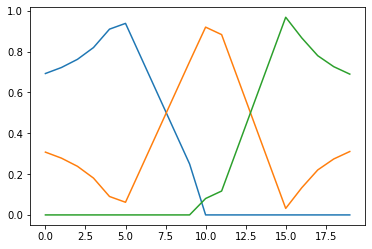

In [30]:
#Perhaps prototype locations are based on the means?


clf=SoftKNN(k=2)
prototype_loc = np.array([4.64,10.45,15.15])
prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
clf.fit(prototype_loc, prototype_lab)
x=np.linspace(0,19, 20)
preds=clf.probabilities(x)
plt.plot(x,preds)
print(clf.probabilities([5,14]))
print(clf.probabilities([0,9,10,19]))

[[0.90783395 0.05996701 0.03219904]
 [0.08492028 0.22390248 0.69117724]]


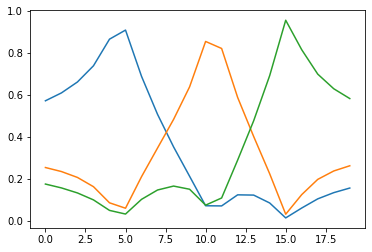

In [29]:
clf=SoftKNN(k=3)
prototype_loc = np.array([4.64,10.45,15.15])
prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
clf.fit(prototype_loc, prototype_lab)
x=np.linspace(0,19, 20)
preds=clf.probabilities(x)
plt.plot(x,preds)
print(clf.probabilities([5,14]))

[<AxesSubplot:title={'center':'Train Ex. 1'}>, <AxesSubplot:title={'center':'Train Ex. 2'}>, <AxesSubplot:ylabel='"Strong" Prototype'>, <AxesSubplot:ylabel='"Weak" Prototype'>, <AxesSubplot:ylabel='1NN Exemplar'>, <AxesSubplot:xlabel='x', ylabel='2NN Exemplar'>]


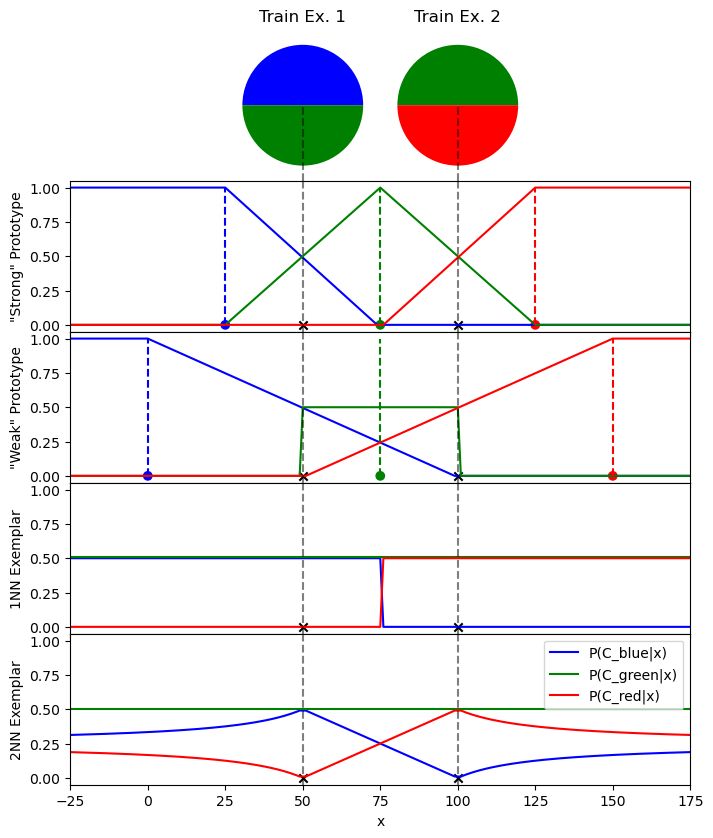

In [114]:
mixture_loc = [50,100]
mixture_lab = [(0.5, 0.5, 0), (0,0.5,0.5)]

fig=plt.figure(figsize=(8,10), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(5,4,2)
plt.pie(mixture_lab[0], colors='bgr')
plt.title("Train Ex. 1")

plt.subplot(5,4,3)
plt.pie(mixture_lab[1], colors='bgr')
plt.title("Train Ex. 2")


ax1=plt.subplot(5,1,2)

# Prototype model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. No stochasticity at each prototype
prototype_loc = [25,75,125]
prototype_lab = [(1, 0, 0), (0,1,0), (0,0,1)]
x=np.linspace(-25,175, 201)
class1_prob = 0*x
class1_prob[x<=prototype_loc[0]]=1
#class1_prob[x>=prototype_loc[1]]=0
class1_prob[50:100]=np.linspace(0,1,prototype_loc[1]-prototype_loc[0])[::-1]
class3_prob=class1_prob[::-1]
class2_prob = 0*x
class2_prob[50:101] = np.linspace(0,1,51)
class2_prob[100:151] = np.linspace(0,1,51)[::-1]
plt.plot(x, class1_prob, c='b', label="P(C_blue|x)")
plt.plot([prototype_loc[0], prototype_loc[0]], [0,1], c='b', linestyle='--')
plt.plot(x, class2_prob, c='g', label="P(C_green|x)")
plt.plot([prototype_loc[1], prototype_loc[1]], [0,1], c='g', linestyle='--')
plt.plot(x, class3_prob, c='r', label="P(C_red|x)")
plt.plot([prototype_loc[2], prototype_loc[2]], [0,1], c='r', linestyle='--')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
#plt.xlabel('x')
plt.ylabel('"Strong" Prototype')
plt.ylim((-0.05,1.05))
plt.tick_params('x', labelbottom=False)
#plt.legend()

#plt.title("Prototype model with 'strong' prototypes", y=1.08)


plt.subplot(5,1,3, sharex=ax1, sharey=ax1)

###
# Prototype model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. Can have stochasticity at prototype, assume linear probability decay between mixtures
prototype_loc = [0,75,150]
prototype_lab = [(1, 0, 0), (0,0.5,0), (0,0,1)]
#x=np.linspace(0,150, 151)
class1_prob = 0*x
class1_prob[x<=prototype_loc[0]]=1
#class1_prob[x>=prototype_loc[1]]=0
class1_prob[25:125]=np.linspace(0,1,mixture_loc[1])[::-1]
class3_prob=class1_prob[::-1]
class2_prob = 0*x
class2_prob[75:101] = np.linspace(0.5,0.5,26)
class2_prob[100:126] = np.linspace(0.5,0.5,26)[::-1]
plt.plot(x, class1_prob, c='b')
plt.plot([prototype_loc[0], prototype_loc[0]], [0,1], c='b', linestyle='--')
plt.plot(x, class2_prob, c='g')
plt.plot([prototype_loc[1], prototype_loc[1]], [0,1], c='g', linestyle='--')
plt.plot(x, class3_prob, c='r')
plt.plot([prototype_loc[2], prototype_loc[2]], [0,1], c='r', linestyle='--')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
#plt.xlabel('x')
plt.ylabel('"Weak" Prototype')
#plt.title("Prototype model with 'weak' prototypes", y=1.08)
plt.tick_params('x', labelbottom=False)


plt.subplot(5,1,4, sharex=ax1, sharey=ax1)

###
# Exemplar model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. 1NN model
def nearest(i):
    return np.argmin(np.abs(mixture_loc-i))
#x=np.linspace(-25,175, 201)
class1_prob = [mixture_lab[nearest(i)][0] for i in x]
class2_prob = [mixture_lab[nearest(i)][1]+(0.0075) for i in x]
class3_prob = [mixture_lab[nearest(i)][2] for i in x]
plt.plot(x, class1_prob, c='b', linestyle='-')
plt.plot(x, class2_prob, c='g', linestyle='-')
plt.plot(x, class3_prob, c='r')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
#plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
#plt.xlabel('x')
plt.ylabel('1NN Exemplar')
#plt.title('1NN exemplar model', y=1.08)
plt.tick_params('x', labelbottom=False)

plt.subplot(5,1,5, sharex=ax1, sharey=ax1)

###
# Exemplar model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. 2NN model
def mix(i):
    dists=np.abs(mixture_loc-i)
    dists=np.array([np.max([dist,1]) for dist in dists])
    tdist=np.sum(dists)
    vals=np.dot(np.transpose(mixture_lab),1/dists)
    return vals/np.sum(vals)#*tdist
#x=np.linspace(-25,175, 201)
#print([mix(i) for i in x])
class1_prob = [mix(i)[0] for i in x]
class2_prob = [mix(i)[1] for i in x]
class3_prob = [mix(i)[2] for i in x]
plt.plot(x, class1_prob, c='b', linestyle='-')
plt.plot(x, class2_prob, c='g', linestyle='-')
plt.plot(x, class3_prob, c='r')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
#plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
plt.xlabel('x')
plt.ylabel('2NN Exemplar')
plt.xlim(-25,175)
#plt.title('2NN exemplar model', y=1.08)

from matplotlib.legend import _get_legend_handles_labels
plt.legend(*_get_legend_handles_labels(fig.axes))



ax_list = fig.axes
print(ax_list)
ax_list[0].axvline(0,0,0.5, c='black', alpha=0.5, linestyle='--')
ax_list[-4].axvline(50,0,1, c='black', alpha=0.5, linestyle='--')
ax_list[-3].axvline(50,0,1, c='black', alpha=0.5, linestyle='--')
ax_list[-2].axvline(50,0,1, c='black', alpha=0.5, linestyle='--')
ax_list[-1].axvline(50,0,1, c='black', alpha=0.5, linestyle='--')


ax_list[1].axvline(0,0,0.5, c='black', alpha=0.5, linestyle='--')
ax_list[-4].axvline(100,0,1, c='black', alpha=0.5, linestyle='--')
ax_list[-3].axvline(100,0,1, c='black', alpha=0.5, linestyle='--')
ax_list[-2].axvline(100,0,1, c='black', alpha=0.5, linestyle='--')
ax_list[-1].axvline(100,0,1, c='black', alpha=0.5, linestyle='--')

fig.subplots_adjust(hspace=0, wspace=0)


plt.show()

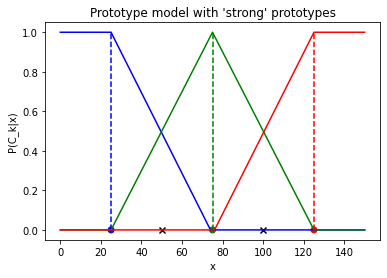

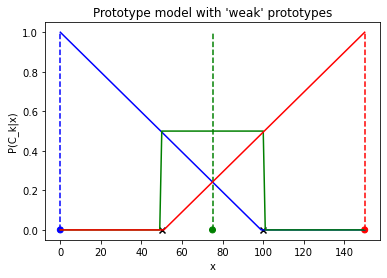

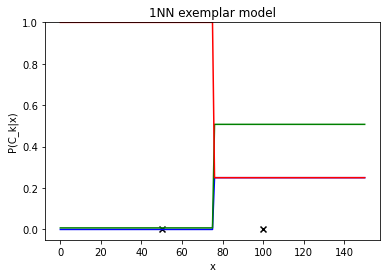

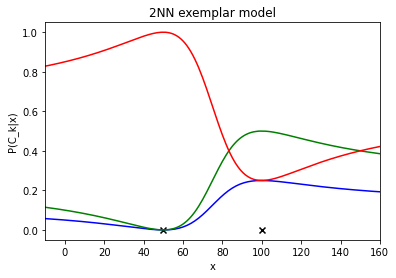

In [32]:
mixture_loc = [50,100]
mixture_lab = [(0., 0.,1), (0.25,0.5,0.25)]

# Prototype model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. No stochasticity at each prototype
prototype_loc = [25,75,125]
prototype_lab = [(1, 0, 0), (0,1,0), (0,0,1)]
x=np.linspace(0,150, 151)
class1_prob = 0*x
class1_prob[x<=prototype_loc[0]]=1
#class1_prob[x>=prototype_loc[1]]=0
class1_prob[25:75]=np.linspace(0,1,prototype_loc[1]-prototype_loc[0])[::-1]
class3_prob=class1_prob[::-1]
class2_prob = 0*x
class2_prob[25:76] = np.linspace(0,1,51)
class2_prob[75:126] = np.linspace(0,1,51)[::-1]
plt.plot(x, class1_prob, c='b')
plt.plot([prototype_loc[0], prototype_loc[0]], [0,1], c='b', linestyle='--')
plt.plot(x, class2_prob, c='g')
plt.plot([prototype_loc[1], prototype_loc[1]], [0,1], c='g', linestyle='--')
plt.plot(x, class3_prob, c='r')
plt.plot([prototype_loc[2], prototype_loc[2]], [0,1], c='r', linestyle='--')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
plt.xlabel('x')
plt.ylabel('P(C_k|x)')
plt.title("Prototype model with 'strong' prototypes")
plt.show()
###
# Prototype model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. Can have stochasticity at prototype, assume linear probability decay between mixtures
prototype_loc = [0,75,150]
prototype_lab = [(1, 0, 0), (0,0.5,0), (0,0,1)]
x=np.linspace(0,150, 151)
class1_prob = 0*x
class1_prob[x<=prototype_loc[0]]=1
#class1_prob[x>=prototype_loc[1]]=0
class1_prob[0:100]=np.linspace(0,1,mixture_loc[1])[::-1]
class3_prob=class1_prob[::-1]
class2_prob = 0*x
class2_prob[50:76] = np.linspace(0.5,0.5,26)
class2_prob[75:101] = np.linspace(0.5,0.5,26)[::-1]
plt.plot(x, class1_prob, c='b')
plt.plot([prototype_loc[0], prototype_loc[0]], [0,1], c='b', linestyle='--')
plt.plot(x, class2_prob, c='g')
plt.plot([prototype_loc[1], prototype_loc[1]], [0,1], c='g', linestyle='--')
plt.plot(x, class3_prob, c='r')
plt.plot([prototype_loc[2], prototype_loc[2]], [0,1], c='r', linestyle='--')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
plt.xlabel('x')
plt.ylabel('P(C_k|x)')
plt.title("Prototype model with 'weak' prototypes")
plt.show()
###
# Exemplar model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. 1NN model
def nearest(i):
    return np.argmin(np.abs(mixture_loc-i))
x=np.linspace(0,150, 151)
class1_prob = [mixture_lab[nearest(i)][0] for i in x]
class2_prob = [mixture_lab[nearest(i)][1]+(0.0075) for i in x]
class3_prob = [mixture_lab[nearest(i)][2] for i in x]
plt.plot(x, class1_prob, c='b', linestyle='-')
plt.plot(x, class2_prob, c='g', linestyle='-')
plt.plot(x, class3_prob, c='r')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
#plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
plt.xlabel('x')
plt.ylabel('P(C_k|x)')
plt.ylim(-0.05,1)
plt.title('1NN exemplar model')
plt.show()
###
# Exemplar model assuming:
# 1. goal is for probabilities at mixture points to match mixture labels
# 2. probabilities do not vanish in limit 
# 3. 2NN model
def mix(i):
    dists=np.abs(mixture_loc-i)
    dists=np.array([np.max([dist,1]) for dist in dists])
    tdist=np.sum(dists)
    vals=np.dot(np.transpose(mixture_lab),1/dists**2)
    return vals/np.sum(vals)#*tdist
x=np.linspace(-150,300, 451)
#print([mix(i) for i in x])
class1_prob = [mix(i)[0] for i in x]
class2_prob = [mix(i)[1] for i in x]
class3_prob = [mix(i)[2] for i in x]
plt.plot(x, class1_prob, c='b', linestyle='-')
plt.plot(x, class2_prob, c='g', linestyle='-')
plt.plot(x, class3_prob, c='r')
plt.scatter(mixture_loc,[0,0], marker='x', c='black')
#plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
plt.xlabel('x')
plt.ylabel('P(C_k|x)')
#plt.ylim(-0.05,1)
plt.xlim(-10,160)
plt.title('2NN exemplar model')
plt.show()

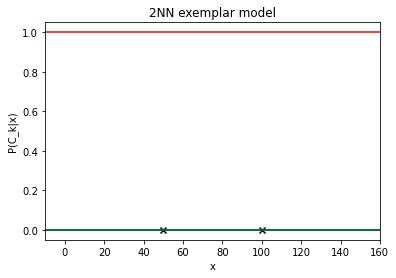

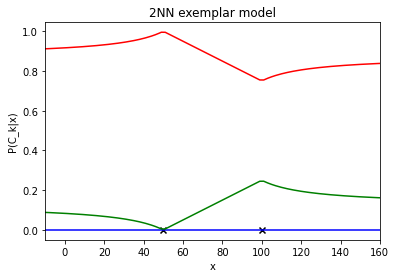

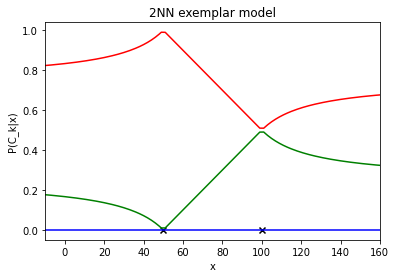

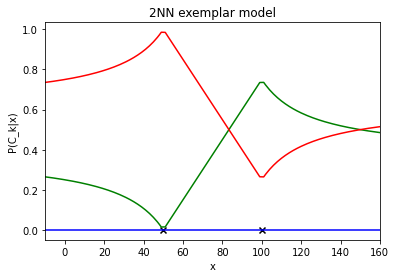

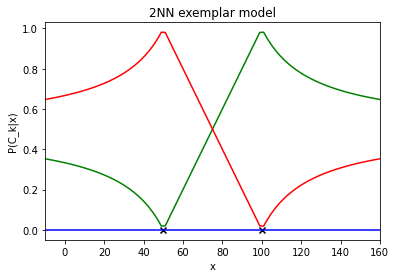

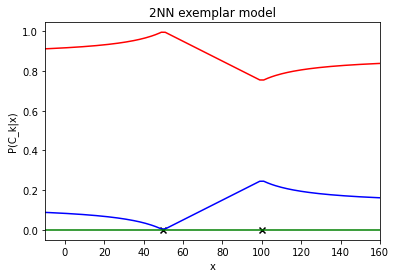

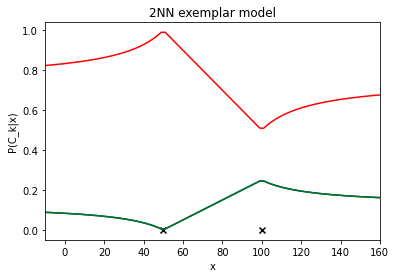

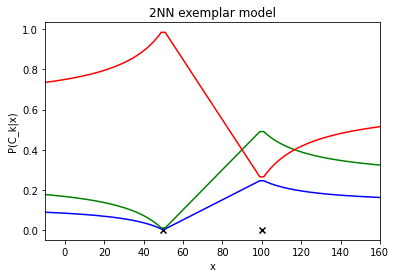

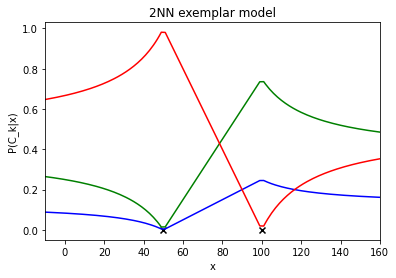

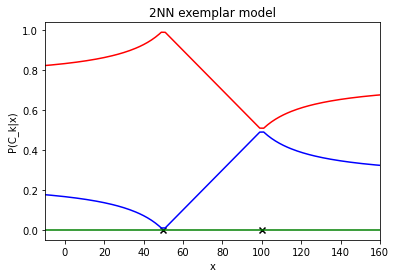

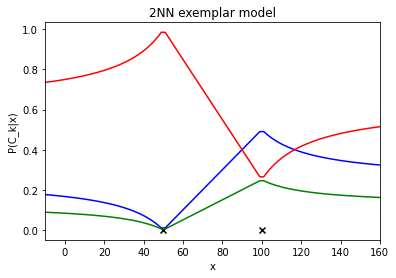

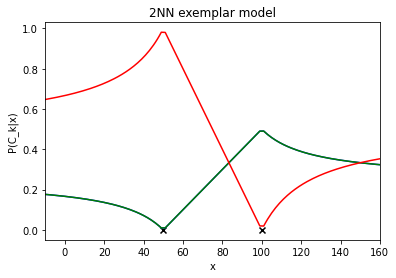

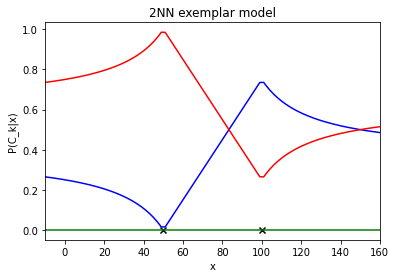

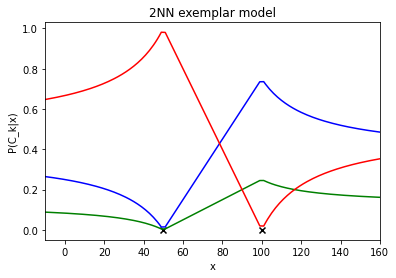

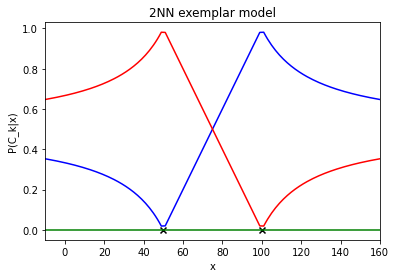

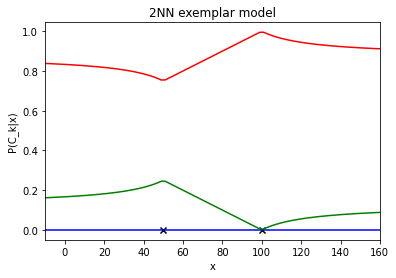

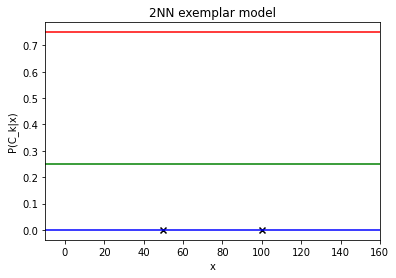

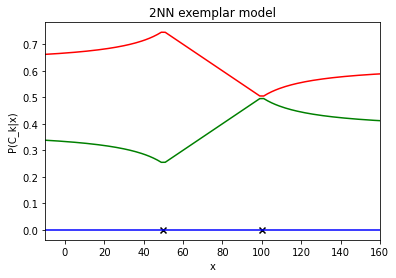

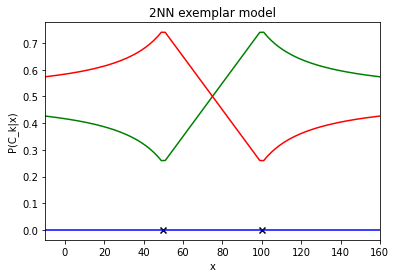

KeyboardInterrupt: 

In [115]:
levels = [0, 0.25, 0.5, 0.75, 1]
m_combos = [[i,j,1-(i+j)] for i in levels for j in levels if i+j<=1]


x=np.linspace(-150,300, 451)

for m1 in m_combos:
    for m2 in m_combos:
        mixture_lab = [m1,m2]

        #print([mix(i) for i in x])
        class1_prob = [mix(i)[0] for i in x]
        class2_prob = [mix(i)[1] for i in x]
        class3_prob = [mix(i)[2] for i in x]
        plt.plot(x, class1_prob, c='b', linestyle='-')
        plt.plot(x, class2_prob, c='g', linestyle='-')
        plt.plot(x, class3_prob, c='r')
        plt.scatter(mixture_loc,[0,0], marker='x', c='black')
        #plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
        plt.xlabel('x')
        plt.ylabel('P(C_k|x)')
        #plt.ylim(-0.05,1)
        plt.xlim(-10,160)
        plt.title('2NN exemplar model')
        plt.show()

([<matplotlib.patches.Wedge at 0x7fd33793d470>,
 [Text(0.6465637441936395, 0.8899187180267095, ''),
  Text(-0.8899187482945419, 0.6465637025335369, ''),
  Text(1.0298943251329445e-07, -1.0999999999999954, '')])

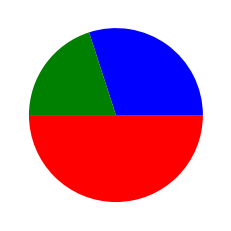

In [150]:
plt.pie([0.3,0.2,0.5], colors='bgr')

[[0, 0, 1], [0, 0.25, 0.75], [0, 0.5, 0.5], [0, 0.75, 0.25], [0, 1, 0], [0.25, 0, 0.75], [0.25, 0.25, 0.5], [0.25, 0.5, 0.25], [0.25, 0.75, 0.0], [0.5, 0, 0.5], [0.5, 0.25, 0.25], [0.5, 0.5, 0.0], [0.75, 0, 0.25], [0.75, 0.25, 0.0], [1, 0, 0]]


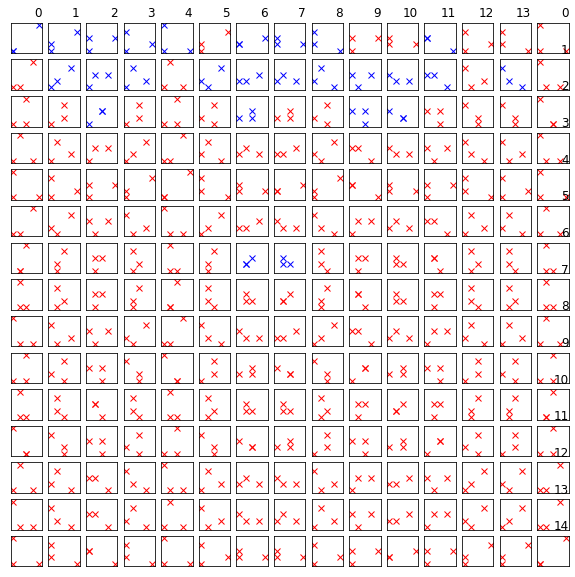

In [116]:
all_m=[]
for i in range(len(m_combos)):
    for j in range(len(m_combos)):
        m1=m_combos[i]
        m2=m_combos[j]
        all_m.append(np.array(list(zip(m1,m2))))
        
#uniq = np.unique(all_m, axis=0)
def gen_equiv(m):
    c1=m
    c2=m[:,[1,0]]
    c1r1 = c1[[0,1,2],:]
    c1r2 = c1[[0,2,1],:]
    c1r3 = c1[[1,0,2],:]
    c1r4 = c1[[1,2,0],:]
    c1r5 = c1[[2,0,1],:]
    c1r6 = c1[[2,1,0],:]
    c2r1 = c2[[0,1,2],:]
    c2r2 = c2[[0,2,1],:]
    c2r3 = c2[[1,0,2],:]
    c2r4 = c2[[1,2,0],:]
    c2r5 = c2[[2,0,1],:]
    c2r6 = c2[[2,1,0],:]
    return [c1r1, c1r2, c1r3, c1r4, c1r5, c1r6, c2r1, c2r2, c2r3, c2r4, c2r5, c2r6]
uniq=[]
inds=[]
i=0
for m in all_m:
    equivs = gen_equiv(m)
    if not np.any([str(e) in uniq for e in equivs]):
        uniq.append(str(m))
        inds.append(i)
    i+=1

    
m_combos = [[i,j,1-(i+j)] for i in levels for j in levels if i+j<=1]
plt.rcParams['figure.figsize'] = [10, 10]
skips = [[0,5], [0,9], [0,10], [0,12], [0,13], [0,14],
        [1,14], [],
        [1,4], [2,4],[3,4],[4,4],[2,3],[3,3],
        ]
#unique_combos = [list(m) for m in np.unique([sorted(m) for m in m_combos], axis=0)]
for i in range(len(m_combos)):
    for j in range(len(m_combos)):
        m1=m_combos[i]
        m2=m_combos[j]
        
        if True or j>=i:
            plt.subplot(15, 15, i*15+j+1)
            #plt.axis('off')
            ax = plt.gca()
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            #plt.plot(m1, c='b')
            #plt.plot(m2, c='b')
            plt.xlim([-0.1,1.1])
            plt.ylim([-0.1,1.1])
            if i*15+j not in inds: #m_combos[j] not in unique_combos:#[i,j] in skips or j==14 or i==14: 
                c='r' 
            else: 
                c='b'
            x = list(zip(m1,m2))
            plt.plot(*x[0],marker='x', c=c)
            plt.plot(*x[1],marker='x', c=c)
            plt.plot(*x[2],marker='x', c=c)
#             plt.plot(min(m1[0],m2[0]),max(m1[0],m2[0]),marker='x', c=c)
#             plt.plot(min(m1[1],m2[1]),max(m1[1],m2[1]),marker='x', c=c)
#             plt.plot(min(m1[2],m2[2]),max(m1[2],m2[2]),marker='x', c=c)
            if i==0:
                plt.title( j, loc='right')
            if j==14:
                plt.title( i, loc='right')

print(m_combos)

[[0. 0.]
 [0. 0.]
 [1. 1.]]
[array([0., 0., 1.]), array([0., 0., 1.])]


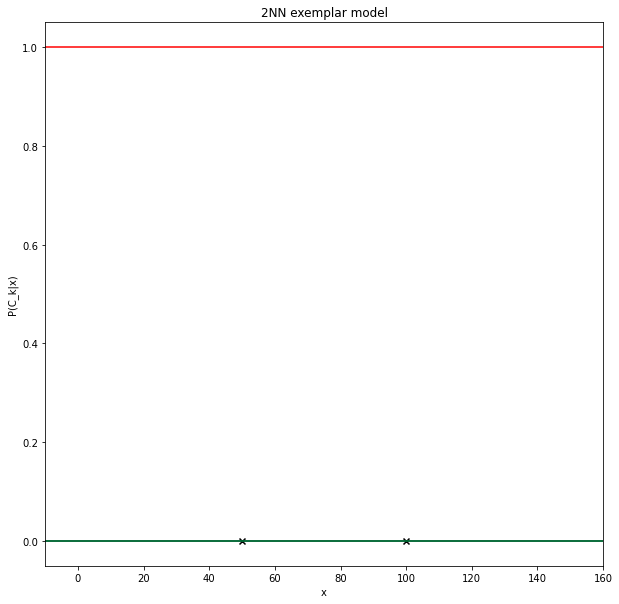

[[0.   0.  ]
 [0.   0.25]
 [1.   0.75]]
[array([0., 0., 1.]), array([0.  , 0.25, 0.75])]


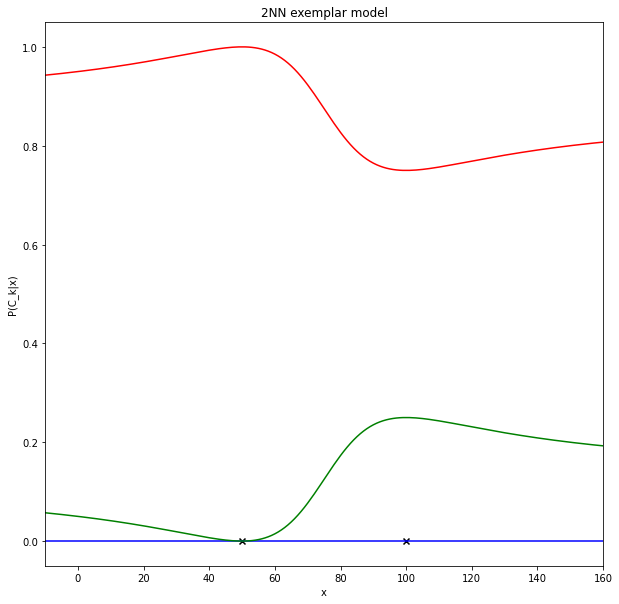

[[0.  0. ]
 [0.  0.5]
 [1.  0.5]]
[array([0., 0., 1.]), array([0. , 0.5, 0.5])]


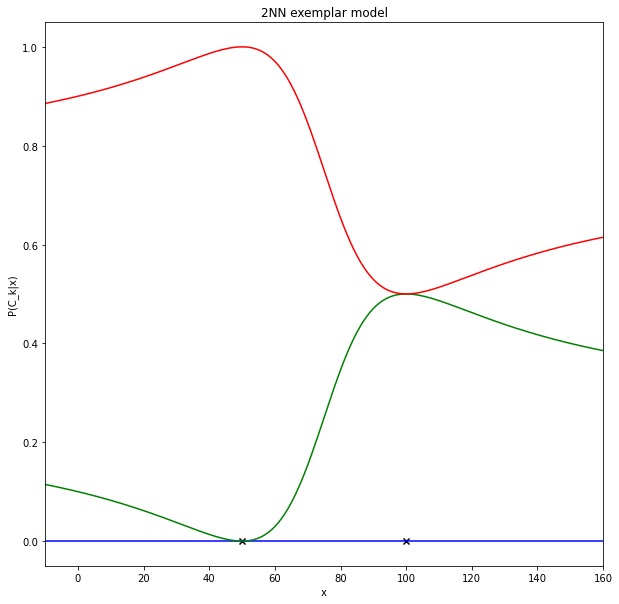

[[0.   0.  ]
 [0.   0.75]
 [1.   0.25]]
[array([0., 0., 1.]), array([0.  , 0.75, 0.25])]


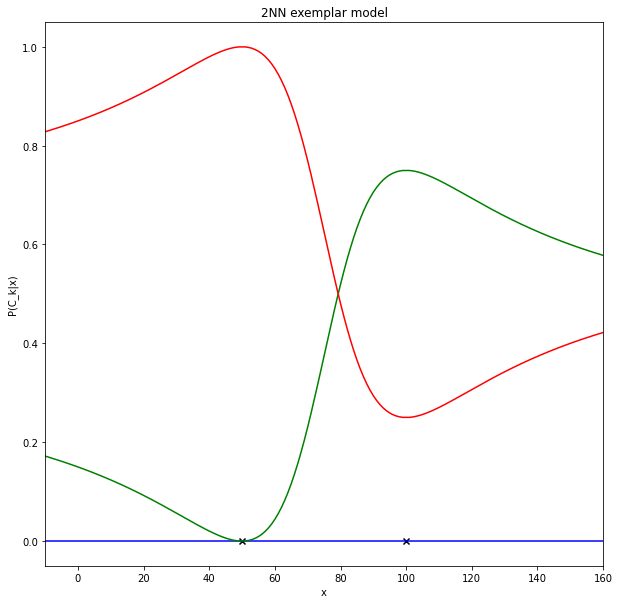

[[0. 0.]
 [0. 1.]
 [1. 0.]]
[array([0., 0., 1.]), array([0., 1., 0.])]


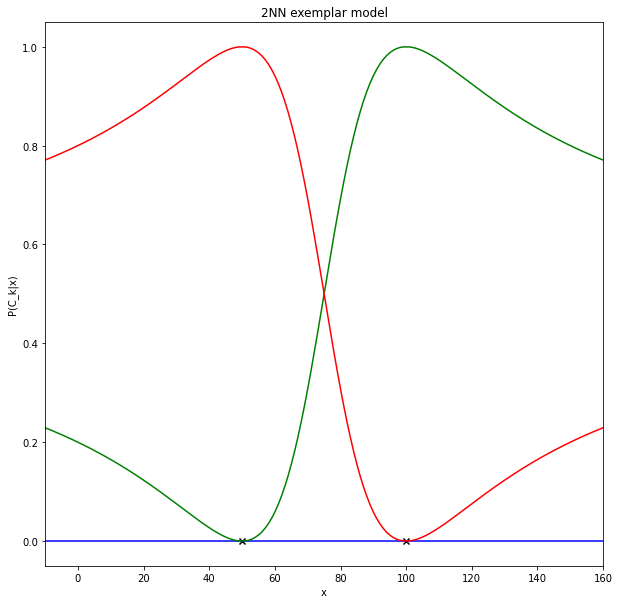

[[0.   0.25]
 [0.   0.25]
 [1.   0.5 ]]
[array([0., 0., 1.]), array([0.25, 0.25, 0.5 ])]


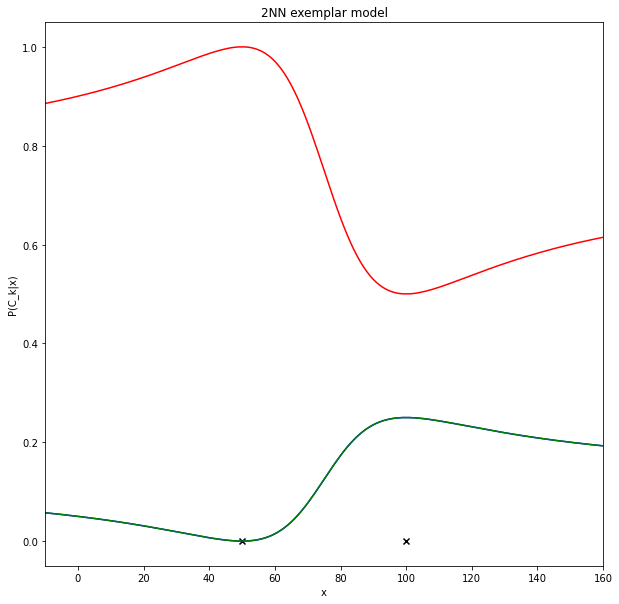

[[0.   0.25]
 [0.   0.5 ]
 [1.   0.25]]
[array([0., 0., 1.]), array([0.25, 0.5 , 0.25])]


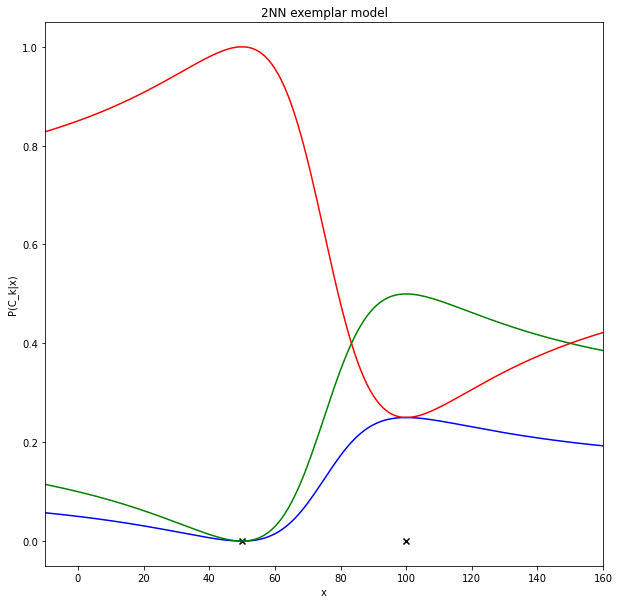

[[0.   0.25]
 [0.   0.75]
 [1.   0.  ]]
[array([0., 0., 1.]), array([0.25, 0.75, 0.  ])]


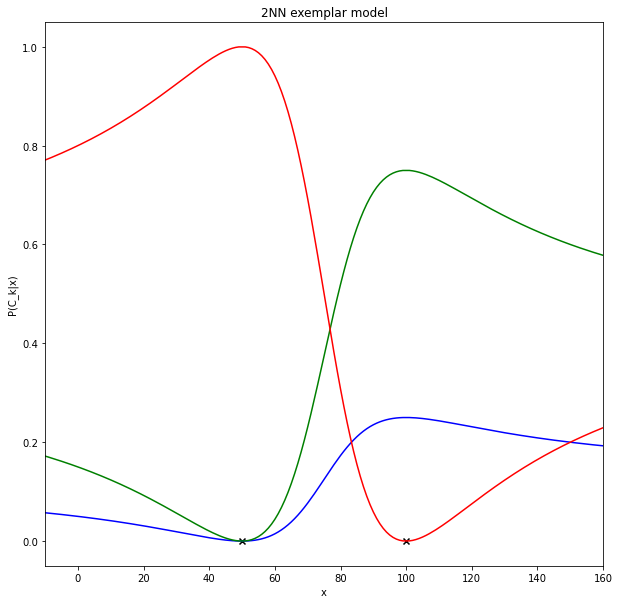

[[0.  0.5]
 [0.  0.5]
 [1.  0. ]]
[array([0., 0., 1.]), array([0.5, 0.5, 0. ])]


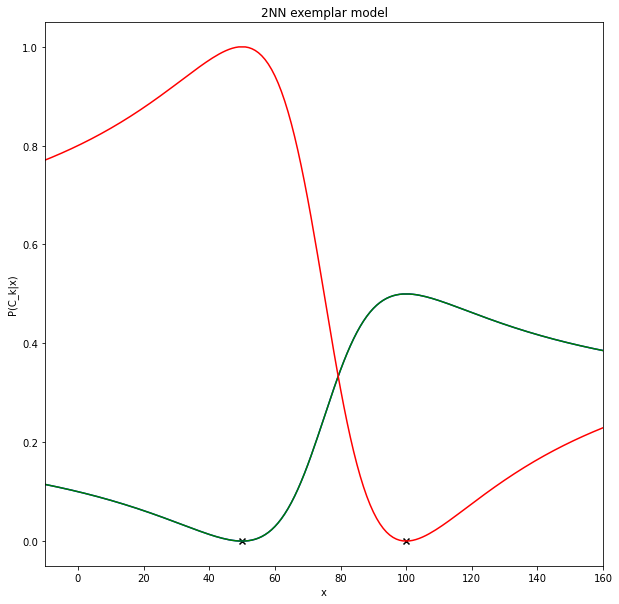

[[0.   0.  ]
 [0.25 0.25]
 [0.75 0.75]]
[array([0.  , 0.25, 0.75]), array([0.  , 0.25, 0.75])]


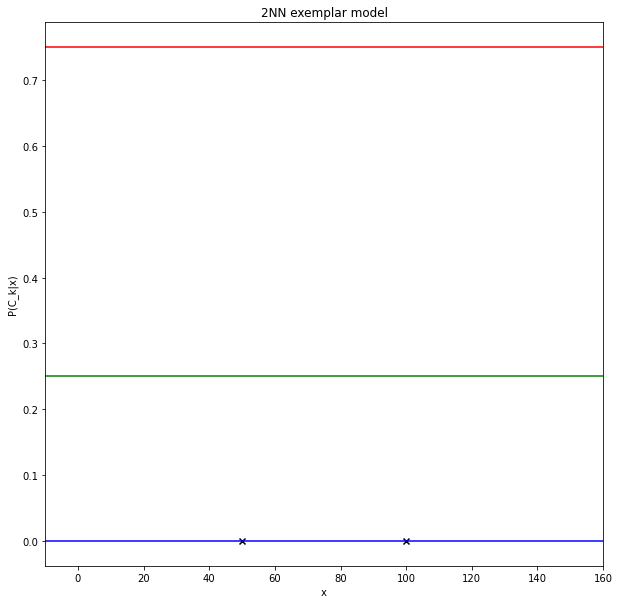

[[0.   0.  ]
 [0.25 0.5 ]
 [0.75 0.5 ]]
[array([0.  , 0.25, 0.75]), array([0. , 0.5, 0.5])]


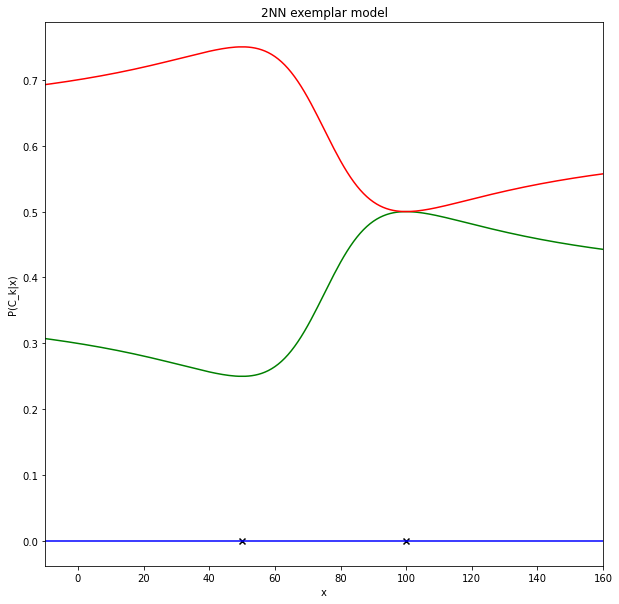

[[0.   0.  ]
 [0.25 0.75]
 [0.75 0.25]]
[array([0.  , 0.25, 0.75]), array([0.  , 0.75, 0.25])]


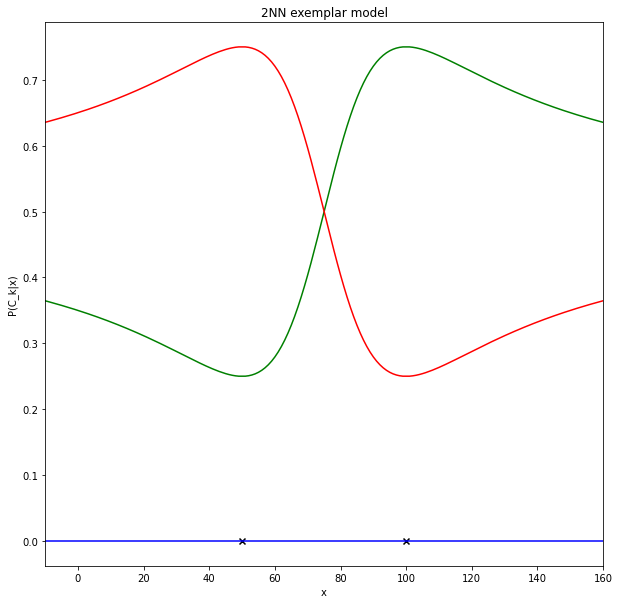

[[0.   0.25]
 [0.25 0.  ]
 [0.75 0.75]]
[array([0.  , 0.25, 0.75]), array([0.25, 0.  , 0.75])]


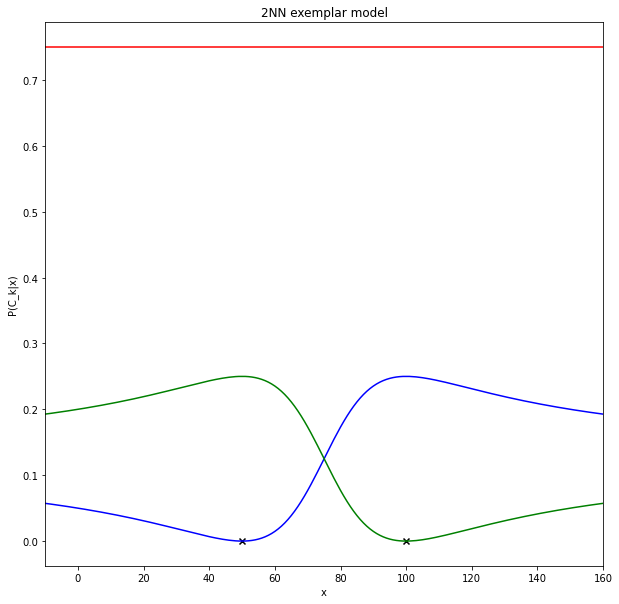

[[0.   0.25]
 [0.25 0.25]
 [0.75 0.5 ]]
[array([0.  , 0.25, 0.75]), array([0.25, 0.25, 0.5 ])]


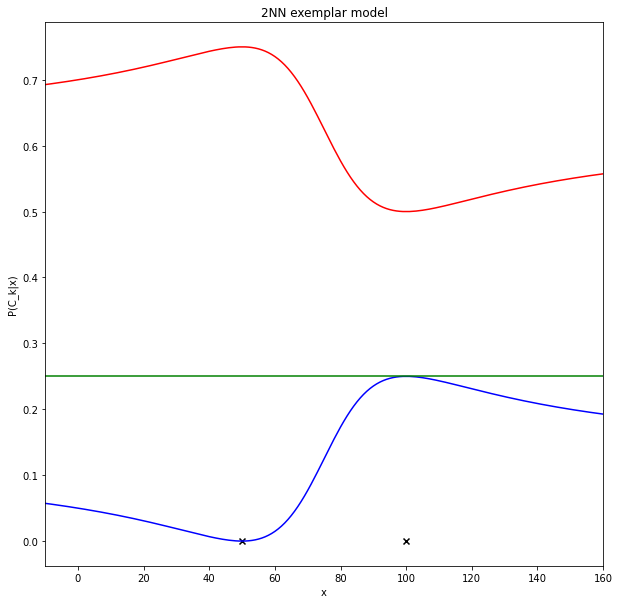

[[0.   0.25]
 [0.25 0.5 ]
 [0.75 0.25]]
[array([0.  , 0.25, 0.75]), array([0.25, 0.5 , 0.25])]


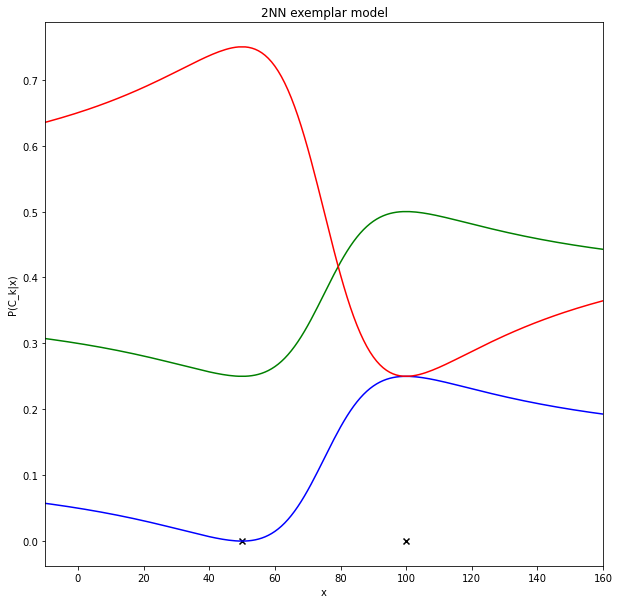

[[0.   0.25]
 [0.25 0.75]
 [0.75 0.  ]]
[array([0.  , 0.25, 0.75]), array([0.25, 0.75, 0.  ])]


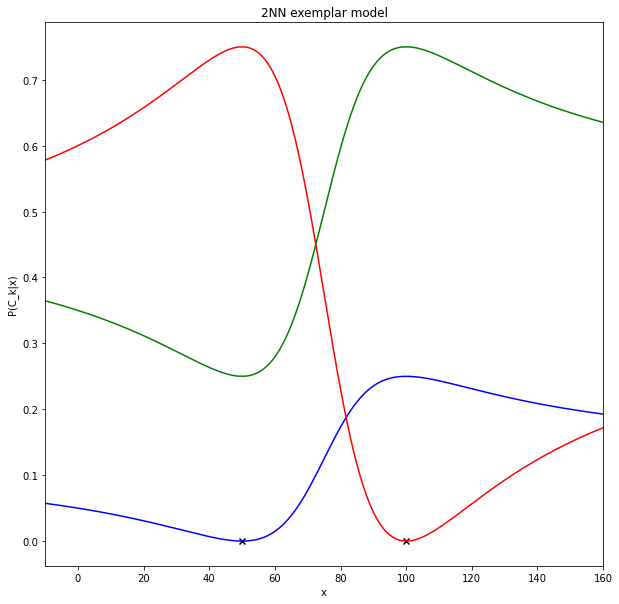

[[0.   0.5 ]
 [0.25 0.  ]
 [0.75 0.5 ]]
[array([0.  , 0.25, 0.75]), array([0.5, 0. , 0.5])]


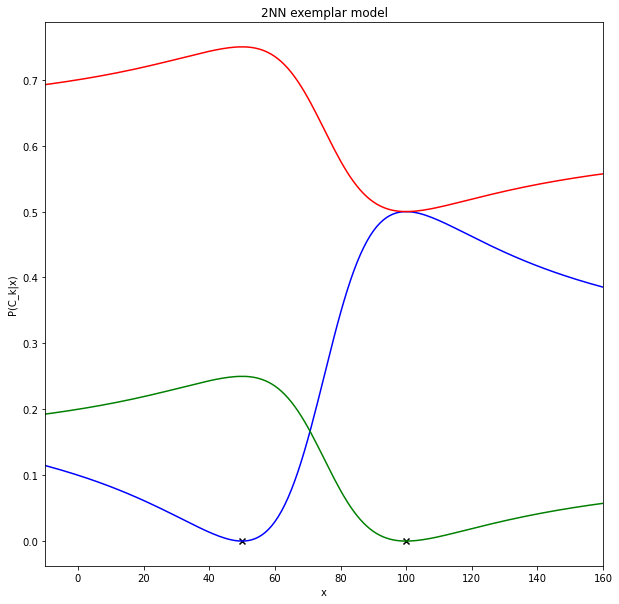

[[0.   0.5 ]
 [0.25 0.25]
 [0.75 0.25]]
[array([0.  , 0.25, 0.75]), array([0.5 , 0.25, 0.25])]


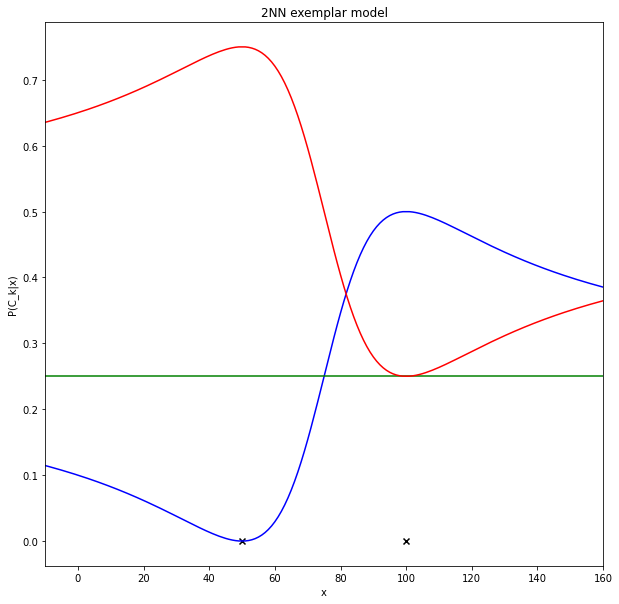

[[0.   0.5 ]
 [0.25 0.5 ]
 [0.75 0.  ]]
[array([0.  , 0.25, 0.75]), array([0.5, 0.5, 0. ])]


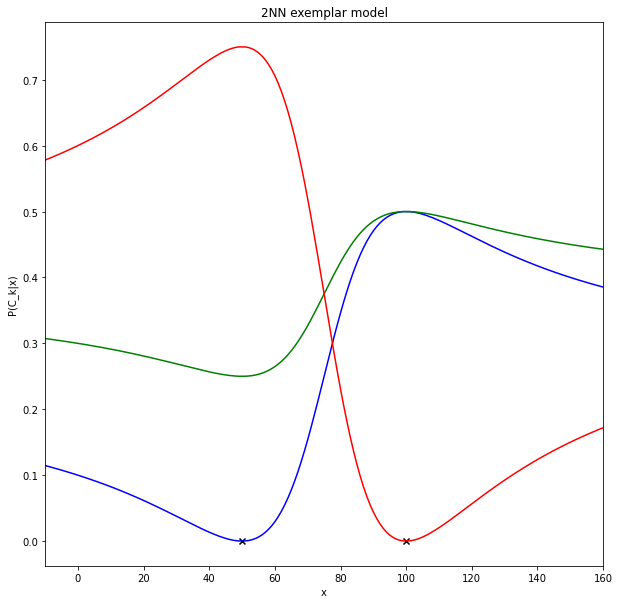

[[0.   0.75]
 [0.25 0.25]
 [0.75 0.  ]]
[array([0.  , 0.25, 0.75]), array([0.75, 0.25, 0.  ])]


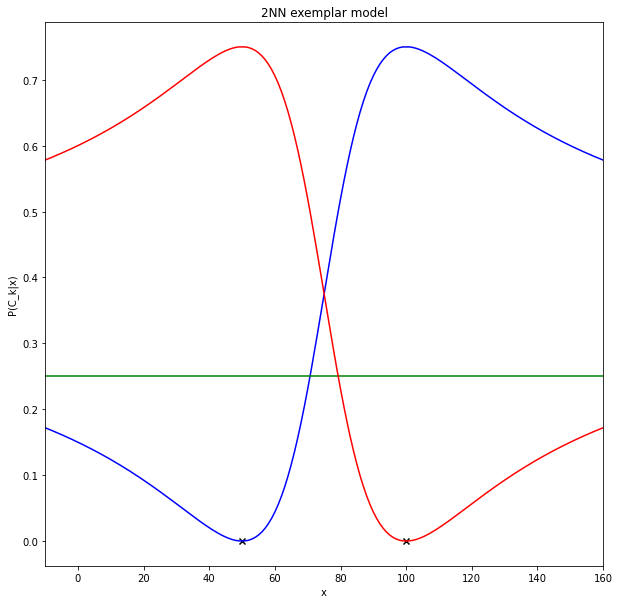

[[0.  0. ]
 [0.5 0.5]
 [0.5 0.5]]
[array([0. , 0.5, 0.5]), array([0. , 0.5, 0.5])]


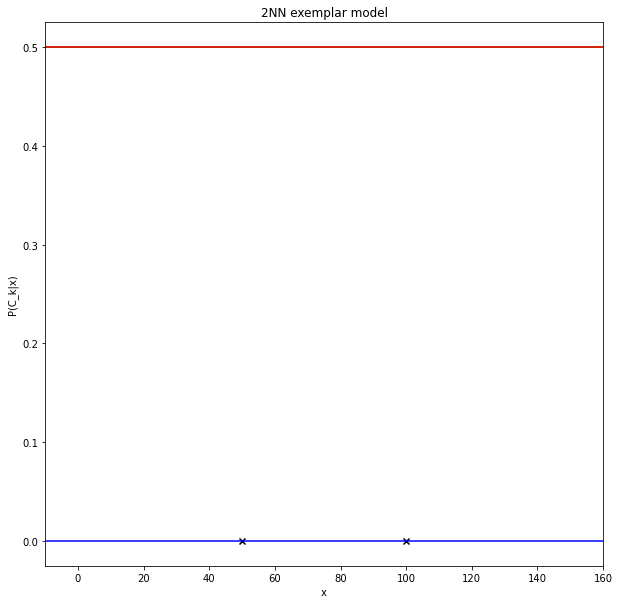

[[0.   0.25]
 [0.5  0.25]
 [0.5  0.5 ]]
[array([0. , 0.5, 0.5]), array([0.25, 0.25, 0.5 ])]


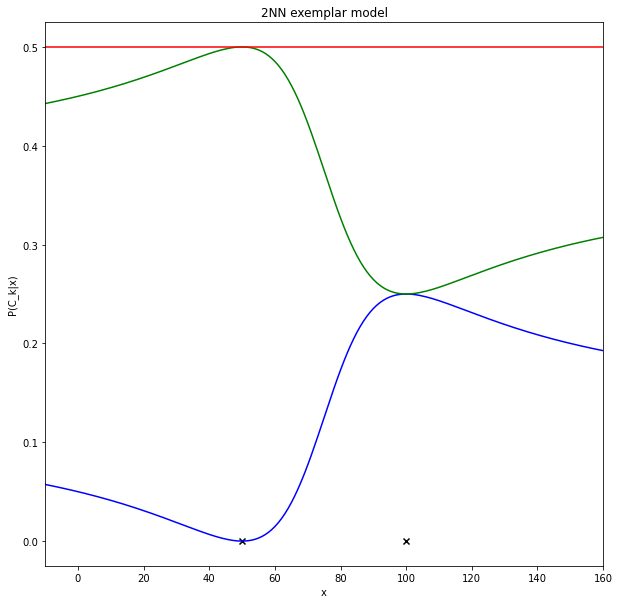

[[0.  0.5]
 [0.5 0. ]
 [0.5 0.5]]
[array([0. , 0.5, 0.5]), array([0.5, 0. , 0.5])]


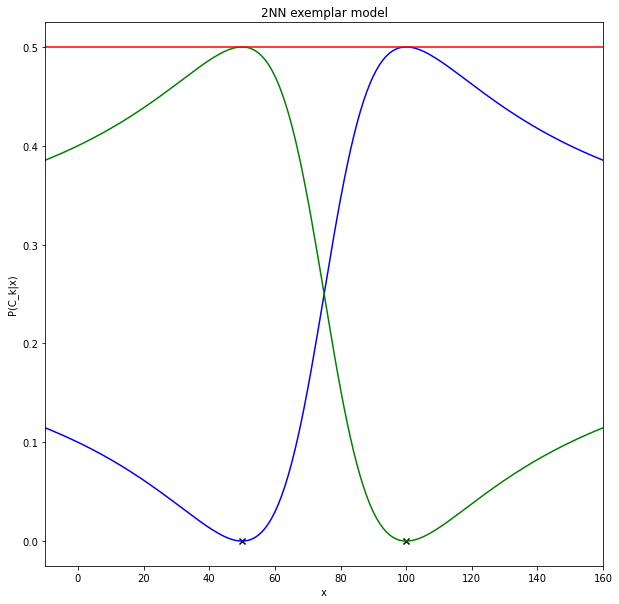

[[0.   0.5 ]
 [0.5  0.25]
 [0.5  0.25]]
[array([0. , 0.5, 0.5]), array([0.5 , 0.25, 0.25])]


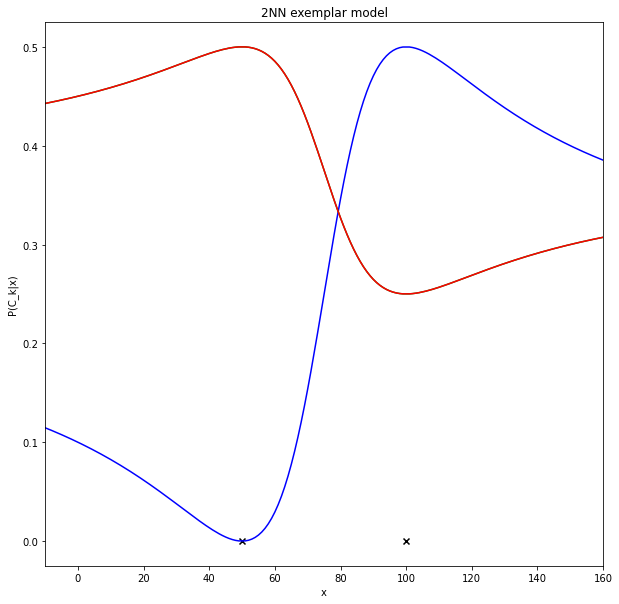

[[0.25 0.25]
 [0.25 0.25]
 [0.5  0.5 ]]
[array([0.25, 0.25, 0.5 ]), array([0.25, 0.25, 0.5 ])]


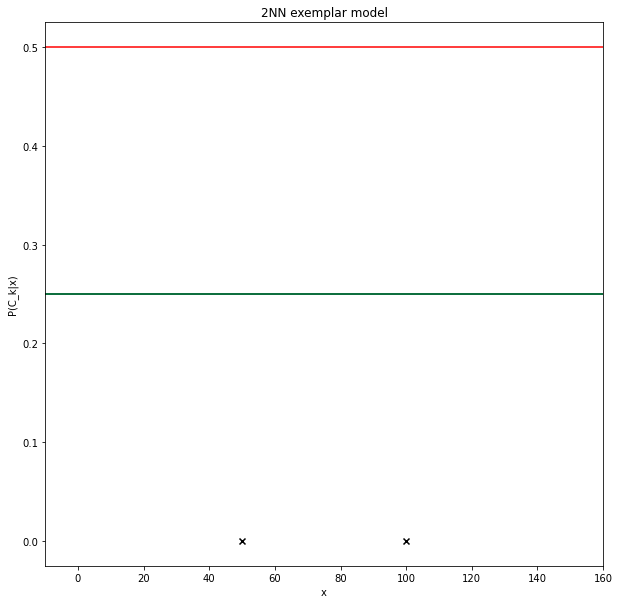

[[0.25 0.25]
 [0.25 0.5 ]
 [0.5  0.25]]
[array([0.25, 0.25, 0.5 ]), array([0.25, 0.5 , 0.25])]


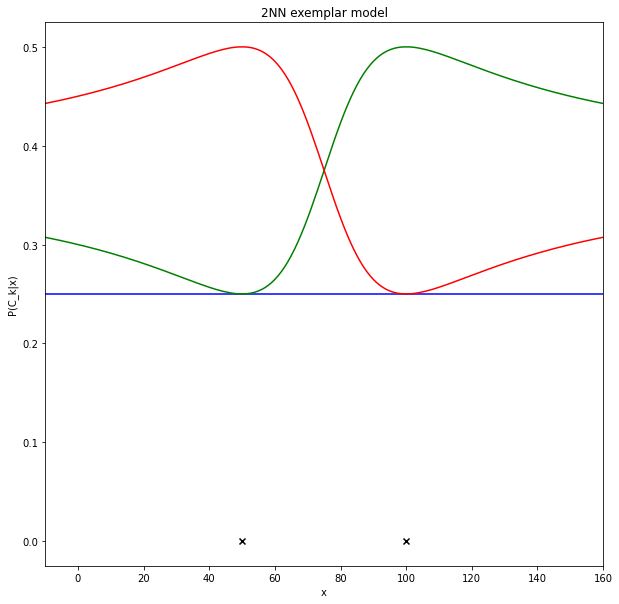

In [402]:
x=np.linspace(-150,300, 451)

for m in np.array(all_m)[inds]:
    print(m)
    mixture_lab = [m[:,0].T,m[:,1].T]
    print(mixture_lab)
    #print([mix(i) for i in x])
    class1_prob = [mix(i)[0] for i in x]
    class2_prob = [mix(i)[1] for i in x]
    class3_prob = [mix(i)[2] for i in x]
    plt.plot(x, class1_prob, c='b', linestyle='-')
    plt.plot(x, class2_prob, c='g', linestyle='-')
    plt.plot(x, class3_prob, c='r')
    plt.scatter(mixture_loc,[0,0], marker='x', c='black')
    #plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
    plt.xlabel('x')
    plt.ylabel('P(C_k|x)')
    #plt.ylim(-0.05,1)
    plt.xlim(-10,160)
    plt.title('2NN exemplar model')
    plt.show()

[array([0., 0., 1.]), array([0.25, 0.25, 0.5 ])]
[array([0., 0., 1.]), array([0.25, 0.5 , 0.25])]
[array([0., 0., 1.]), array([0.25, 0.75, 0.  ])]
[array([0., 0., 1.]), array([0.5, 0.5, 0. ])]
[array([0.  , 0.25, 0.75]), array([0.25, 0.  , 0.75])]
[array([0.  , 0.25, 0.75]), array([0.25, 0.25, 0.5 ])]
[array([0.  , 0.25, 0.75]), array([0.25, 0.5 , 0.25])]
[array([0.  , 0.25, 0.75]), array([0.25, 0.75, 0.  ])]
[array([0.  , 0.25, 0.75]), array([0.5, 0. , 0.5])]
[array([0.  , 0.25, 0.75]), array([0.5 , 0.25, 0.25])]
[array([0.  , 0.25, 0.75]), array([0.5, 0.5, 0. ])]
[array([0.  , 0.25, 0.75]), array([0.75, 0.25, 0.  ])]
[array([0. , 0.5, 0.5]), array([0.25, 0.25, 0.5 ])]
[array([0. , 0.5, 0.5]), array([0.5, 0. , 0.5])]
[array([0. , 0.5, 0.5]), array([0.5 , 0.25, 0.25])]
[array([0.25, 0.25, 0.5 ]), array([0.25, 0.25, 0.5 ])]
[array([0.25, 0.25, 0.5 ]), array([0.25, 0.5 , 0.25])]


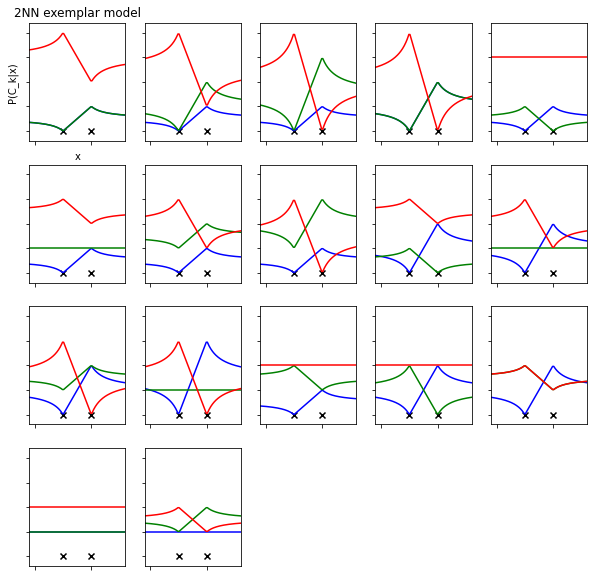

In [132]:
#Exclude the combos where a class is 0 in both mixtures
x=np.linspace(-150,300, 451)
final_mixtures=[]
i=0
for m in np.array(all_m)[inds]:
    mixture_lab = [m[:,0].T,m[:,1].T]
    if np.all(mixture_lab[0]+mixture_lab[1]):
        i+=1
        if i ==1: 
            ax1=plt.subplot(4,5,i)
        else: 
            ax=plt.subplot(4,5,i, sharey=ax1, sharex=ax1)
        final_mixtures.append(mixture_lab)
        print(mixture_lab)
        #print([mix(i) for i in x])
        class1_prob = [mix(i)[0] for i in x]
        class2_prob = [mix(i)[1] for i in x]
        class3_prob = [mix(i)[2] for i in x]
        plt.plot(x, class1_prob, c='b', linestyle='-')
        plt.plot(x, class2_prob, c='g', linestyle='-')
        plt.plot(x, class3_prob, c='r')
        plt.scatter(mixture_loc,[0,0], marker='x', c='black')
        #plt.scatter(prototype_loc,[0,0,0], marker='o', c=['b','g','r'])
        if i ==1: plt.xlabel('x')
        if i==1: plt.ylabel('P(C_k|x)')
        if i!=1: 
            ax.set_yticklabels([])
            ax.set_xticklabels([])


        #plt.ylim(-0.05,1)
        plt.xlim(-10,160)
        plt.ylim(-0.1,1.1)
        if i ==1: plt.title('2NN exemplar model')
        #plt.show()

In [118]:
final_mixtures

[[array([0., 0., 1.]), array([0.25, 0.25, 0.5 ])],
 [array([0., 0., 1.]), array([0.25, 0.5 , 0.25])],
 [array([0., 0., 1.]), array([0.25, 0.75, 0.  ])],
 [array([0., 0., 1.]), array([0.5, 0.5, 0. ])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.  , 0.75])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.25, 0.5 ])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.5 , 0.25])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.75, 0.  ])],
 [array([0.  , 0.25, 0.75]), array([0.5, 0. , 0.5])],
 [array([0.  , 0.25, 0.75]), array([0.5 , 0.25, 0.25])],
 [array([0.  , 0.25, 0.75]), array([0.5, 0.5, 0. ])],
 [array([0.  , 0.25, 0.75]), array([0.75, 0.25, 0.  ])],
 [array([0. , 0.5, 0.5]), array([0.25, 0.25, 0.5 ])],
 [array([0. , 0.5, 0.5]), array([0.5, 0. , 0.5])],
 [array([0. , 0.5, 0.5]), array([0.5 , 0.25, 0.25])],
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.25, 0.5 ])],
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.5 , 0.25])]]